<a href="https://colab.research.google.com/github/leandrominer85/Avaliacao_de_Risco_de_Credito./blob/main/Avalia%C3%A7%C3%A3o_de_Risco_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Avaliação de Risco de Crédito


Uma das área que causa mais problemas para bancos, financiadoras e empresários é a taxa de inadimplência por parte da sua carteira de clientes.

Avaliar se uma pessoa irá deixar de cumprir com suas obrigações financeiras é de extrema importância, e pode causar um grande impacto no balanço da Instituição. Cada vez mais, soluções vêm sendo desenvolvidas e aprimoradas visando minimizar o risco de *default*. 

*Default* é o termo utilizado para indicado o não cumprimento das obrigações e/ou condições de um empréstimo (como financiamentos ou dívidas de cartão de crédito). Normalmente, o principal motivo para o descumprimento das condições de pagamento é incapacidade financeira do cliente.

<p align=center>
  <img src="https://images.unsplash.com/photo-1556742502-ec7c0e9f34b1?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=687&q=80" width="40%">
</p>
 
Grandes bancos e Fintechs têm apostado cada vez mais em modelos de *Machine Learning* para previnir a inadimplência de alguns clientes.

Dentre as principais instituições financeira, o [Nubank](https://nubank.com.br/sobre-nos) é uma das que mais tem se destacado no uso de Inteligência Artificial e times de *Data Science*.

O conjunto de dados a ser utilizado neste Projeto de *Data Science* parte de uma competição realizada pela Startup [Nubank](https://nubank.com.br/sobre-nos) a fim de revelar talentos e potenciais contratações pela Fintech.

## Contextualização do Problema

Neste problema, o objetivo é prever qual a probabilidade de um cliente da Startup Nubank não coumprir com suas obrigações financeiras e deixar de pagar a sua fatura do Cartão de Crédito.

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/10/Nubank_logo.png" width="90px"></p>
  
Vale ressaltar que essa avaliação deve ser realizada no momento em que o cliente solicita o cartão (normalmente no primeiro contato com a instituição).

Espera-se que um modelo seja capaz de minimizar as perdas financeiras do Nubank, porém minimizando também os falsos positivos.

## [Pycaret](https://pycaret.org/) para modelos de Machine Learning

A biblioteca [Pycaret](https://pycaret.org/) permite que em poucas linhas de código resolvamos problemas complexos. Essa biblioteca low-code permite o tratamento do dataset automaticamente, solucionando questões como: outliers, variáveis não normalizadas, desbalanceamento da variável alvo, entre outras. Além disso, ela permite a comparação entre diversos modelos de ML bem como sua optimização utilizando como parâmetro aquele definido pelo usuário.

Utilizarei essa biblioteca para a criação do modelo. Dessa forma, demonstrarei não apenas a possibilidade de uso de um modelo de ML para a solução de um problema empresarial, mas também de que forma tal solução pode ser facilitada pelo uso de uma ferramenta que minimiza a necessidade de intervenção do cientista de dados.


## Sobre os Dados

Os dados que serão utilizados nesta análise estão disponíveis para download por meio [deste link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0). Consiste basicamente em um arquivo `csv` contendo 45.000 entradas e 43 colunas.

Este arquivo será importando para uma estrutura *DataFrame* utilizando a biblioteca `pandas` a fim de possibilitar sua manipulação e análise.

# Análise exploratória

In [ ]:
# instalando o pycaret
!pip install pycaret

     |████████████████████████████████| 318 kB 13.5 MB/s 
     |████████████████████████████████| 56 kB 3.6 MB/s 
     |████████████████████████████████| 86 kB 2.5 MB/s 
     |████████████████████████████████| 167 kB 31.6 MB/s 
     |████████████████████████████████| 114 kB 10.9 MB/s 
     |████████████████████████████████| 261 kB 34.9 MB/s 
     |████████████████████████████████| 1.3 MB 32.6 MB/s 
     |████████████████████████████████| 16.5 MB 150 kB/s 
     |████████████████████████████████| 2.0 MB 32.9 MB/s 
     |████████████████████████████████| 6.8 MB 31.9 MB/s 
     |████████████████████████████████| 1.7 MB 48.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 636 kB 51.7 MB/s 
     |████████████████████████████████| 10.9 MB 56.7 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |██████████████████

In [ ]:
# configurando o pycaret para o Colab
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [ ]:
# Importando os módulos
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import time
from pycaret.classification import *
from pycaret.utils import check_metric

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
# Estilizando o seaborn
sns.set_style('dark')

In [ ]:
# Upload do DF
df = pd.read_csv('http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0', sep=',', encoding='latin_1')

In [ ]:
# Checando o formato
df.shape

(45000, 43)

In [ ]:
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [ ]:
# Estatísticas básicas dos dados
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


In [ ]:
# Checando os tipos das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               45000 non-null  object 
 1   target_default                                    41741 non-null  object 
 2   score_1                                           44438 non-null  object 
 3   score_2                                           44438 non-null  object 
 4   score_3                                           44438 non-null  float64
 5   score_4                                           45000 non-null  float64
 6   score_5                                           45000 non-null  float64
 7   score_6                                           45000 non-null  float64
 8   risk_rate                                         44438 non-null  float64
 9   last_amount_borro

In [ ]:
# verificando os valores únicos por variável
df.nunique().sort_values()

external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               44
n_accounts    

In [ ]:
#Verificando valores ausentes
df.isnull().sum().sort_values(ascending=False)/len(df)

target_fraud                                        0.966178
last_amount_borrowed                                0.665689
last_borrowed_in_months                             0.665689
ok_since                                            0.589889
external_data_provider_credit_checks_last_2_year    0.502844
external_data_provider_credit_checks_last_year      0.336089
credit_limit                                        0.306667
n_issues                                            0.256533
facebook_profile                                    0.099067
marketing_channel                                   0.079511
job_name                                            0.074133
target_default                                      0.072422
external_data_provider_email_seen_before            0.049622
lat_lon                                             0.030289
user_agent                                          0.016044
n_bankruptcies                                      0.015489
n_defaulted_loans       

In [ ]:
df.isin([np.inf, -np.inf]).any()

ids                                                 False
target_default                                      False
score_1                                             False
score_2                                             False
score_3                                             False
score_4                                             False
score_5                                             False
score_6                                             False
risk_rate                                           False
last_amount_borrowed                                False
last_borrowed_in_months                             False
credit_limit                                        False
reason                                              False
income                                              False
facebook_profile                                    False
state                                               False
zip                                                 False
channel       

Apenas com essas estatísticas básicas é possível ver algumas necessidades de limpeza dos dados.

Primeiramente vemos que alguns dados estão criptografados que não podem ser utilizados. No cado da variável indicativa de fraude optei por retirar os dados relativos à fraude - pois que esses são casos que enviesariam o modelo de predição de default.

Além dessas variáveis criptografadas, retirarei algumas que não interessam para a análise - como o código postal.

Também retirarei os casos em que a variável-alvo apresenta valores nulos.

Por fim, preencherei os dados ausentes com três métodos:

* Utilizando o simple imputer com valor zero para as variáveis: 'last_amount_borrowed', 'last_borrowed_in_months' e 'n_bankruptcies'.

* Utilizando o simple imputer com a média da coluna para as variáveis: 'ok_since', 'external_data_provider_credit_checks_last_year', 'credit_limit', 'external_data_provider_email_seen_before', 'reported_income', 'n_defaulted_loans' e 'n_issues'.

* Utilizando o simple imputer com a moda da coluna para as variáveis: facebook_profile', 'marketing_channel' e 'lat_lon'.



In [ ]:
#Removendo valores infinitos
df.replace([np.inf, -np.inf], np.nan,inplace=True)

In [ ]:
df.target_fraud.value_counts()

fraud_friends_family    904
fraud_id                618
Name: target_fraud, dtype: int64

In [ ]:
#Removendo as fraudes
df.drop(df[(df['target_fraud'] =="fraud_friends_family") | (df['target_fraud'] =="fraud_id")].index,axis=0, inplace = True)

In [ ]:
# Removendo as colunas com dados criptografados, com dados pessoais ou com dados ausentes

to_remove = ['ids',
'profile_phone_number',
'score_1',
'score_2',
'reason',
'state',
'zip',
'channel',
'job_name',
'real_state',
'user_agent',
'external_data_provider_first_name',
'external_data_provider_credit_checks_last_2_year',
'target_fraud',
'profile_tags',
'shipping_zip_code'
]

df.drop(to_remove, axis =1, inplace = True)

In [ ]:
# Removendo as linhas com a variável-alvo ausente

df.dropna(subset=['target_default'], inplace=True)

In [ ]:
# Preenchendo os valores nulos das demais variáveis

zero = ['last_amount_borrowed',
'last_borrowed_in_months',
'n_bankruptcies']

num = ['ok_since',
'external_data_provider_credit_checks_last_year',
'credit_limit',
'external_data_provider_email_seen_before',
'reported_income',
'n_defaulted_loans',
'n_issues']

cats = ['facebook_profile',
'marketing_channel',
'lat_lon'
]

In [ ]:
zero_imputer = SimpleImputer(fill_value= 0)
mean_imputer = SimpleImputer(strategy='mean')
mode_imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
df[zero] =  zero_imputer.fit_transform(df[zero])
df[num] =  mean_imputer.fit_transform(df[num])
df[cats] =  mode_imputer.fit_transform(df[cats])

In [ ]:
df.isnull().sum().sort_values(ascending=False)/len(df)

target_default                                     0.0
n_accounts                                         0.0
reported_income                                    0.0
marketing_channel                                  0.0
lat_lon                                            0.0
external_data_provider_fraud_score                 0.0
external_data_provider_email_seen_before           0.0
external_data_provider_credit_checks_last_year     0.0
external_data_provider_credit_checks_last_month    0.0
email                                              0.0
application_time_in_funnel                         0.0
application_time_applied                           0.0
n_issues                                           0.0
n_defaulted_loans                                  0.0
score_3                                            0.0
n_bankruptcies                                     0.0
ok_since                                           0.0
facebook_profile                                   0.0
income    

## Limpeza e correção das variáveis

In [ ]:
#Transformando os valores de -999 para a coluna external_data_provider_email_seen_before para nan
df.loc[df['external_data_provider_email_seen_before'] == -999.0, 'external_data_provider_email_seen_before'] = np.nan 

In [ ]:
# Arrumando a variável 'shipping_state'
df.shipping_state = df.shipping_state.str.replace('BR-','' )

In [ ]:
# Arrumando a variável 'email'
df.email = df.email.str.replace('ll','l' )

In [ ]:
# Corrigindo a variável de tempo

df['application_time_applied'] = df['application_time_applied'].str.replace('60','00')
df['application_time_applied'] = df['application_time_applied'].str.replace('24','00') 

In [ ]:
# Colocando a variável application_time_applied como tempo
df['application_time_applied'] =  pd.to_datetime(df['application_time_applied'],format='%H:%M:%S', exact=True)

In [ ]:
df['application_time_applied'] = df['application_time_applied'].dt.hour

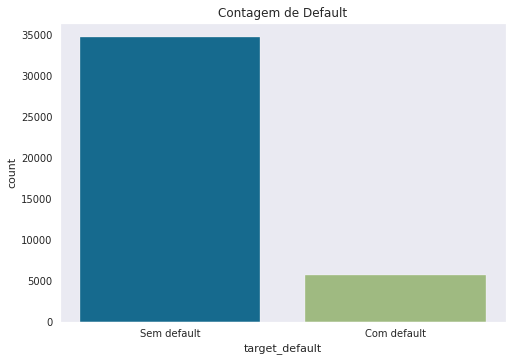

In [ ]:
#Verificando o balanceamento do dataset com relação à variável alvo
fig, ax = plt.subplots()
sns.countplot(data=df ,x="target_default")
ax.set_title("Contagem de Default")
plt.xticks([0,1],['Sem default',"Com default"])
plt.plot();

In [ ]:
df.nunique().sort_values()

target_default                                         2
facebook_profile                                       2
external_data_provider_credit_checks_last_year         3
last_borrowed_in_months                                3
external_data_provider_credit_checks_last_month        4
email                                                  4
n_defaulted_loans                                      6
n_bankruptcies                                         7
marketing_channel                                      9
application_time_applied                              24
shipping_state                                        25
n_accounts                                            44
n_issues                                              45
external_data_provider_email_seen_before              62
risk_rate                                             81
score_3                                               87
ok_since                                             100
application_time_in_funnel     

In [ ]:
cats = ['facebook_profile', 'marketing_channel', 'email',  'shipping_state']

In [ ]:
df_default = df[df.target_default == 1]
df_not_default = df[df.target_default == 0]

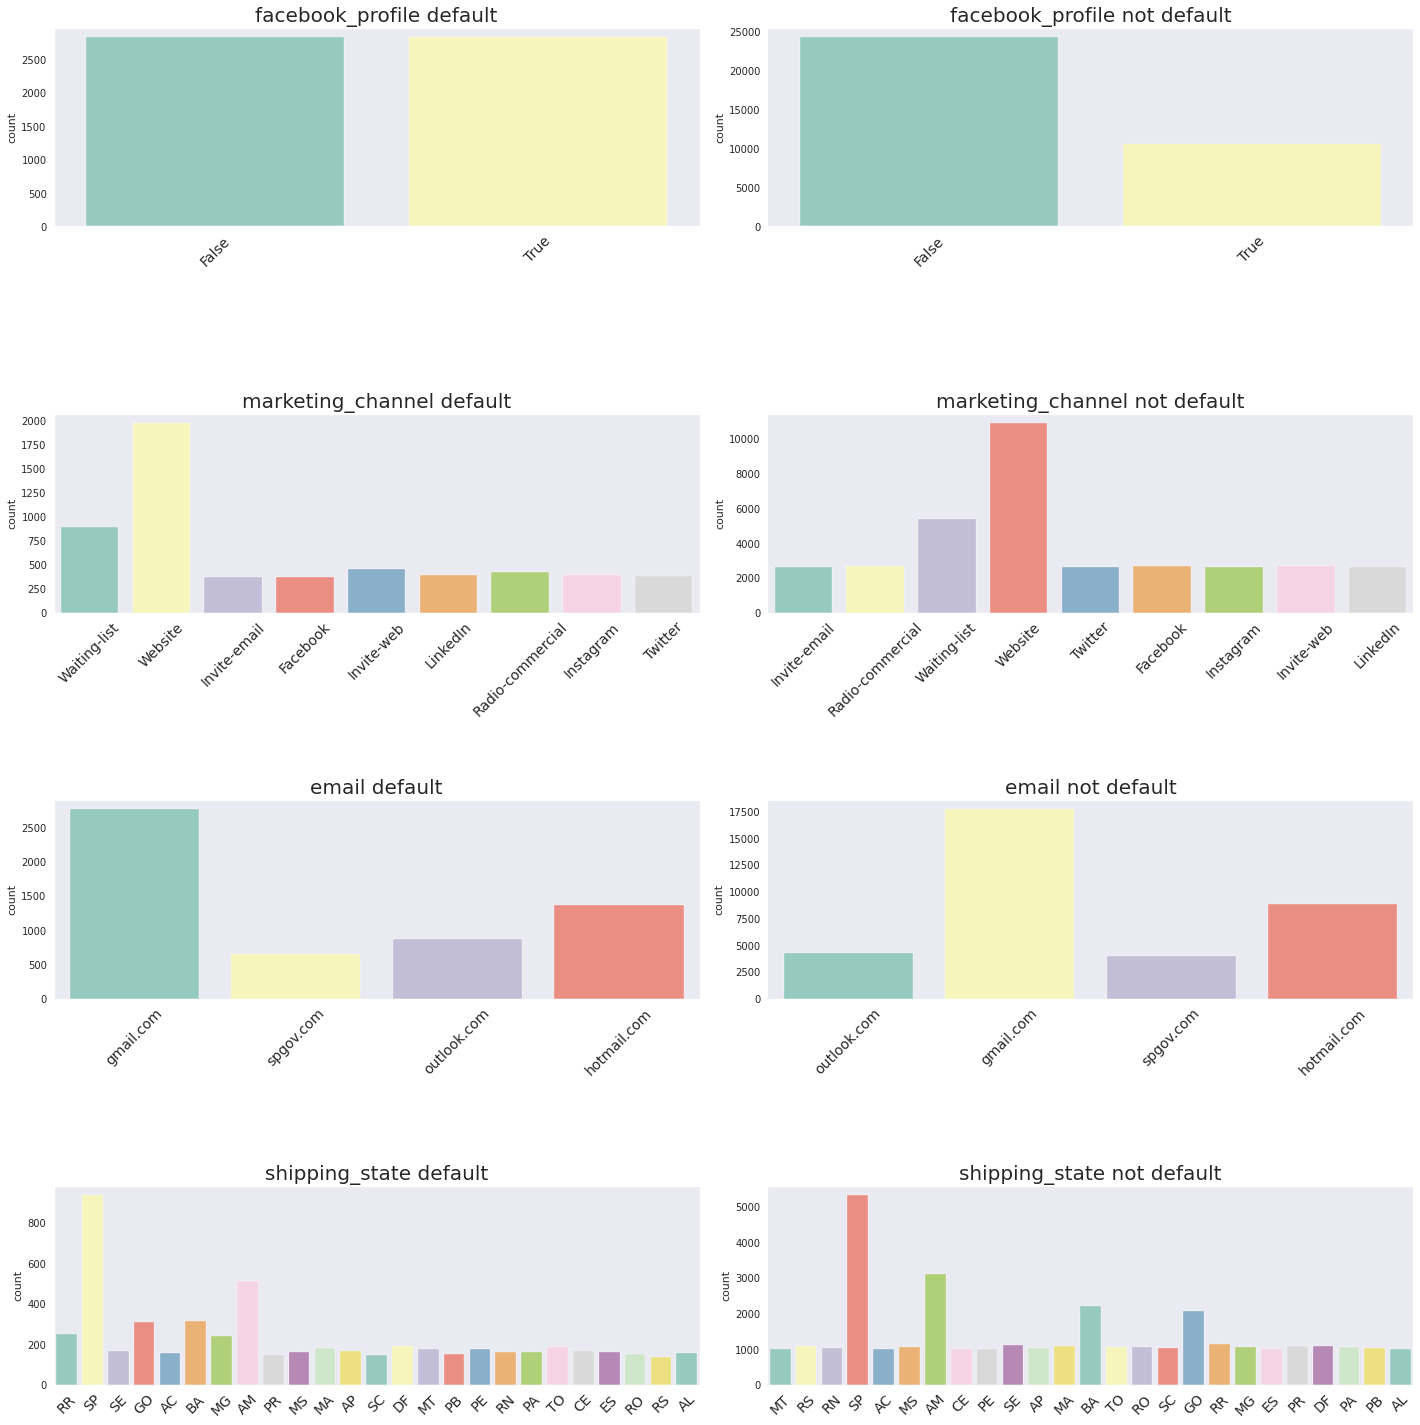

In [ ]:
#Distribuição cumulativa das variáveis categóricas

fig, ax = plt.subplots(nrows=4,ncols=2, figsize=[20,20])
fig.subplots_adjust(hspace=1, wspace=1)
n= 0

for i in cats:
    plt.subplot(4,2,n+1)
    sns.countplot(data=df_default,x=i,orient='h', palette="Set3")
    plt.title(i+' default', fontsize=20)
    plt.xlabel('')
    plt.xticks(rotation=45, fontsize=14)

    plt.subplot(4,2,n+2)
    sns.countplot(data=df_not_default,x=i,orient='h', palette="Set3")
    plt.title(i+' not default', fontsize=20)
    plt.xlabel('')
    plt.xticks(rotation=45, fontsize=14)
    n+=2

plt.tight_layout(pad=1.2, h_pad=5);

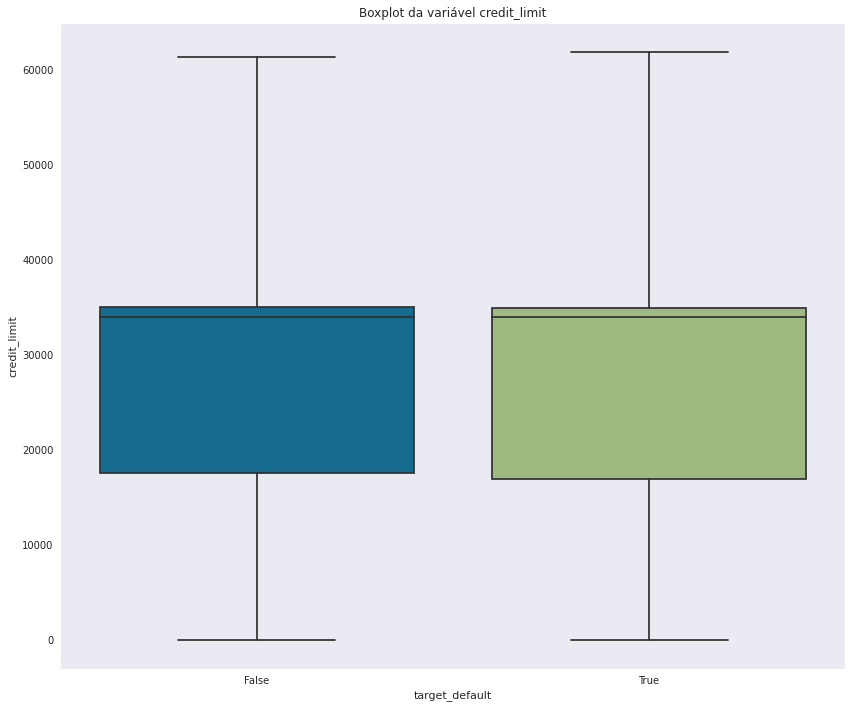

In [ ]:
# Boxplot da variável credit_limit sem outliers
fig, ax = plt.subplots( figsize=(12,10) )
sns.boxplot(y='credit_limit', data=df,x='target_default', showfliers = False).set_title('Boxplot da variável credit_limit')
plt.tight_layout();

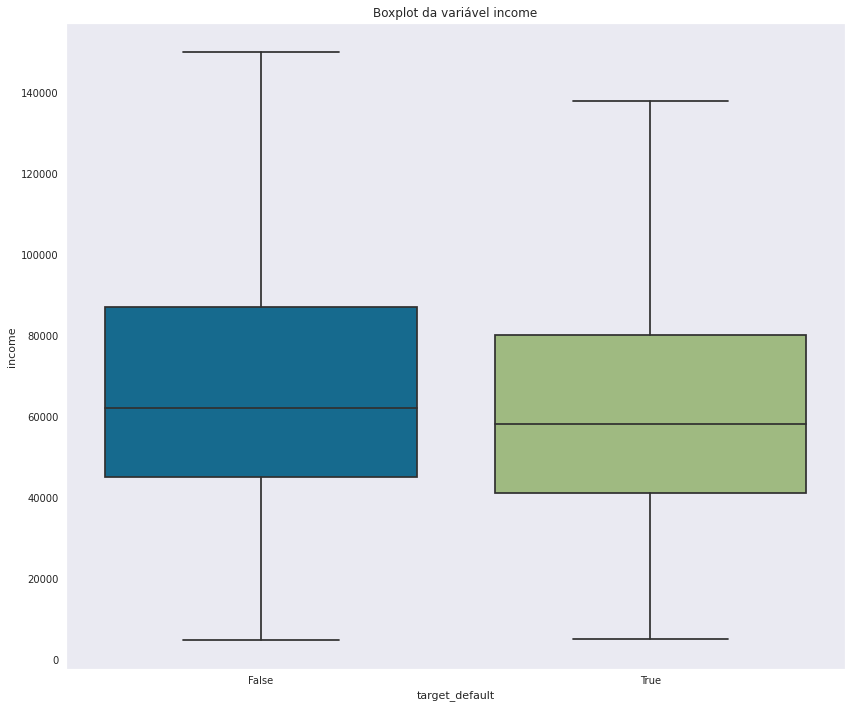

In [ ]:
# Boxplot da distribuição de income total por classe sem outliers
fig, ax = plt.subplots( figsize=(12,10) )
sns.boxplot(y='income', data=df,x='target_default',  showfliers = False).set_title('Boxplot da variável income')
plt.tight_layout();

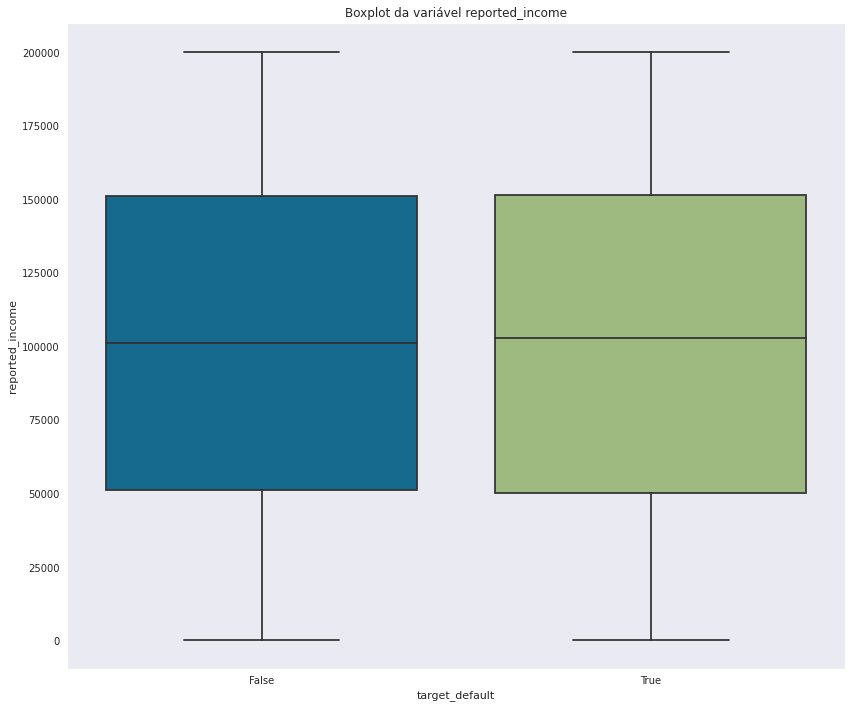

In [ ]:
# Boxplot da distribuição de reported_income total por classe sem outliers
fig, ax = plt.subplots( figsize=(12,10) )
sns.boxplot(y='reported_income', data=df,x='target_default',  showfliers = False).set_title('Boxplot da variável reported_income')
plt.tight_layout();

In [ ]:
cols = [ 'score_3', 'score_4', 'score_5', 'score_6',
       'risk_rate', 'last_amount_borrowed', 'last_borrowed_in_months',
       'credit_limit', 'income', 'ok_since',
       'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues',
        'application_time_in_funnel',
       'external_data_provider_credit_checks_last_month',
       'external_data_provider_credit_checks_last_year',
       'external_data_provider_email_seen_before',
       'external_data_provider_fraud_score',
       'reported_income']

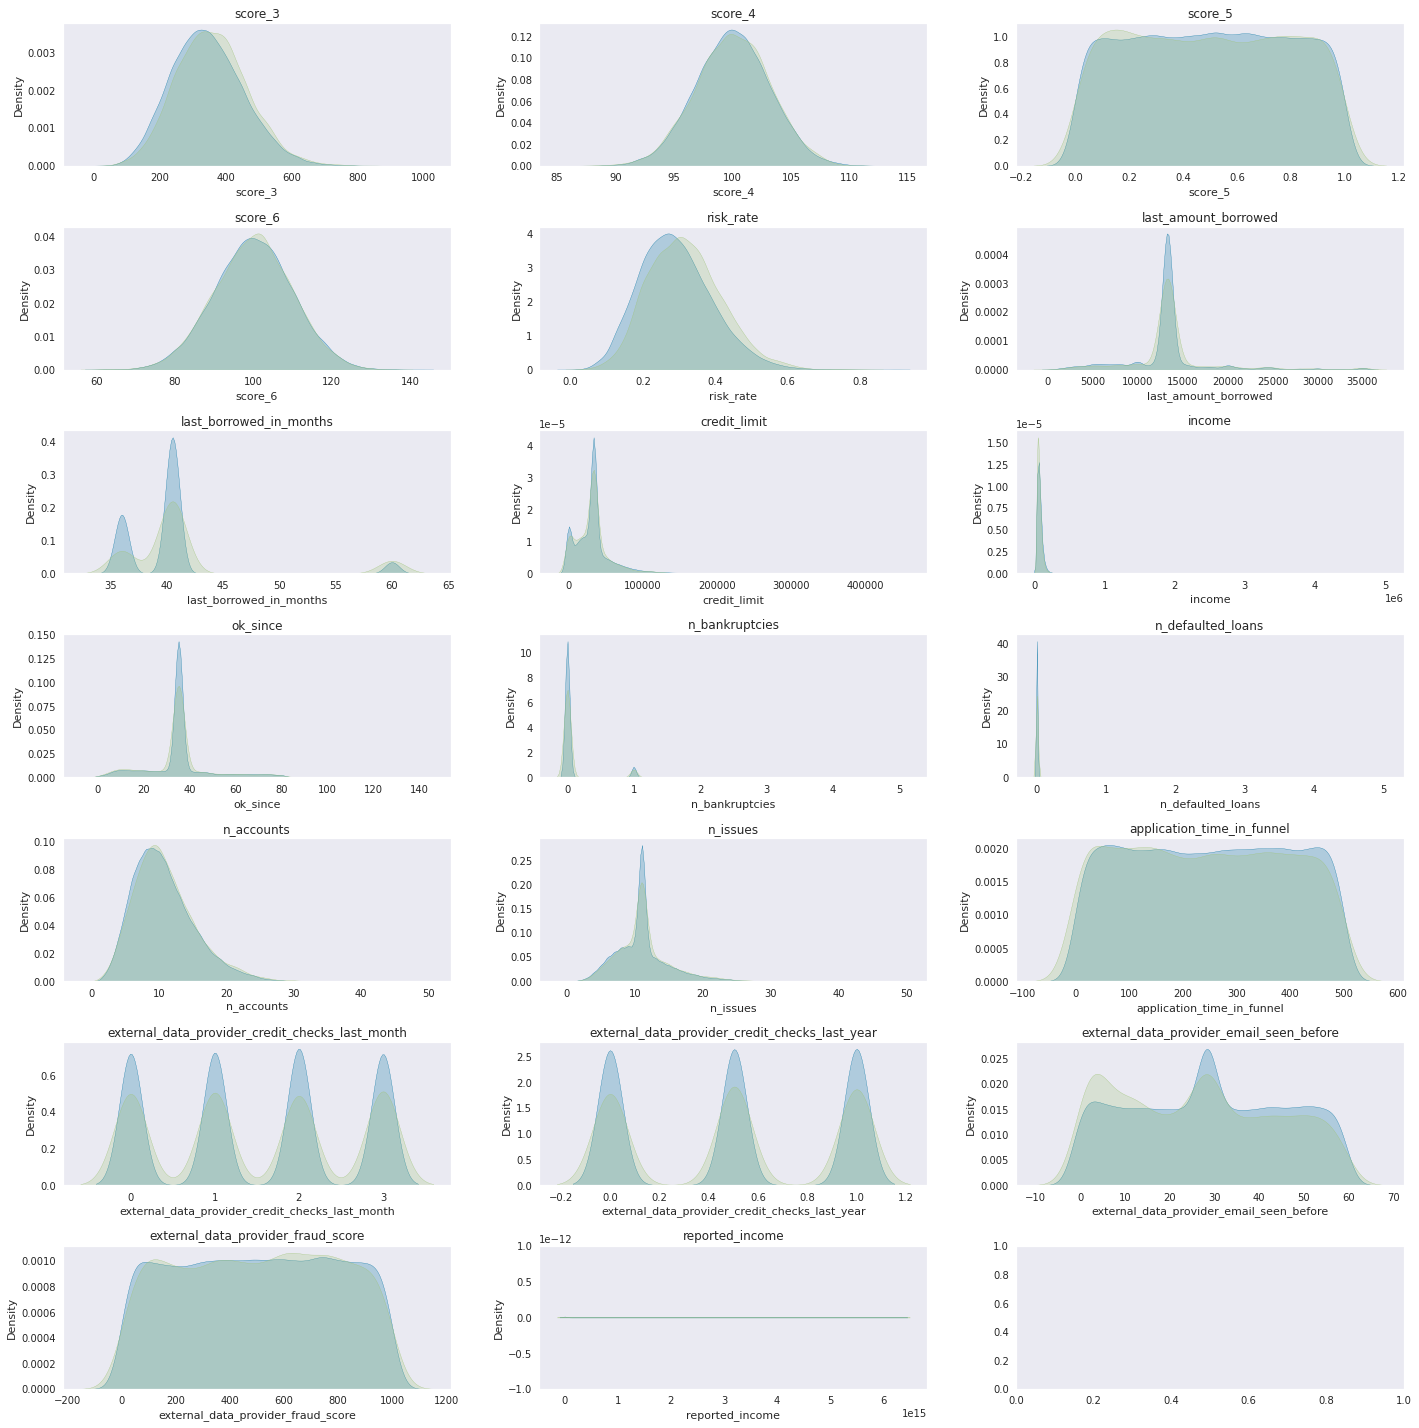

In [ ]:
#Distribuição cumulativa das variáveis


fig, ax = plt.subplots(nrows=7,ncols=3, figsize=[20,20])
fig.subplots_adjust(hspace=1, wspace=1)

for n,i in enumerate(cols):
    plt.subplot(7,3,n+1)
    sns.kdeplot(df[df['target_default']== 0][i], label='Sem default', shade=True)
    sns.kdeplot(df[df['target_default']== 1][i],label='Com default',  shade=True)
    plt.title(i)
plt.tight_layout()

Corrigir as variaveis com outliers muito fortes 

In [ ]:
df_ml = df.drop(labels='lat_lon', axis=1)

In [ ]:
df_ml.target_default = df_ml.target_default.astype(int)

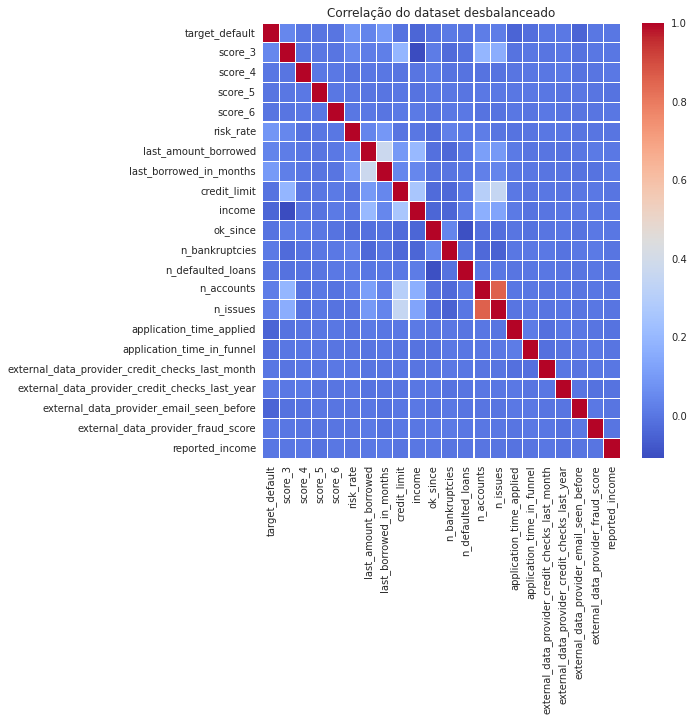

In [ ]:
# Analisando as correlações
plt.subplots(figsize=(8,8))
corr = df_ml.corr()
sns.heatmap(corr,cmap='coolwarm', linewidths=.1)
plt.title("Correlação do dataset desbalanceado")
plt.show();

In [ ]:
# separando os dados em teste e treino
test = df_ml.sample(frac=0.10, random_state=42, weights='target_default')
train = df_ml.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

print('Tamanho do teste: ' + str(test.shape))
print("Tamanho do treino: "  + str(train.shape))

Tamanho do teste: (4038, 26)
Tamanho do treino: (36346, 26)


In [ ]:
train['target_default'].value_counts()

0    34725
1     1621
Name: target_default, dtype: int64

In [ ]:
clf = setup(data =train,
            target = 'target_default',
            session_id=42,
            log_experiment=True,
            experiment_name='default',
            normalize=True,
            fix_imbalance = True,
            feature_selection = False,
           feature_selection_threshold = 0.8,
            remove_outliers = True,
            categorical_features = ['n_bankruptcies', 'n_defaulted_loans',
                                    'external_data_provider_credit_checks_last_month',
                                    'external_data_provider_credit_checks_last_year',
                                    'facebook_profile', 'email', 'marketing_channel',
                                    'shipping_state'],
            remove_multicollinearity = True,
            pca = True,
            ignore_low_variance = True
            )

,Description,Value
0,session_id,42
1,Target,target_default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(36346, 26)"
5,Missing Values,False
6,Numeric Features,17
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


2022/03/25 15:10:26 INFO mlflow.tracking.fluent: Experiment with name 'default' does not exist. Creating a new experiment.


In [ ]:
# Comparando os modelos
best = compare_models(sort="Recall")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.6450,0.0000,0.5736,0.0696,0.1242,0.0498,0.0946,0.157
lda,Linear Discriminant Analysis,0.6450,0.6571,0.5736,0.0696,0.1242,0.0498,0.0946,0.503
lr,Logistic Regression,0.6448,0.6567,0.5726,0.0695,0.1239,0.0496,0.0941,0.663
svm,SVM - Linear Kernel,0.6482,0.0000,0.5717,0.0702,0.1250,0.0509,0.0956,0.544
nb,Naive Bayes,0.5679,0.5447,0.4934,0.0502,0.0911,0.0125,0.0268,0.142
knn,K Neighbors Classifier,0.5913,0.5456,0.4604,0.0498,0.0899,0.0117,0.0241,27.220
qda,Quadratic Discriminant Analysis,0.6174,0.5413,0.4274,0.0498,0.0892,0.0116,0.0226,0.274
ada,Ada Boost Classifier,0.8714,0.5831,0.1698,0.0746,0.1035,0.0455,0.0501,12.680
dt,Decision Tree Classifier,0.8695,0.5091,0.1142,0.0521,0.0714,0.0119,0.0129,3.246
gbc,Gradient Boosting Classifier,0.9341,0.6113,0.0698,0.1069,0.0842,0.0518,0.0531,65.401


In [ ]:
# Criando o modelo SVM
svm = create_model('svm', fold=30)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.6526  0.0000  0.6857  0.0819  0.1463  0.0745  0.1427
       1       0.5844  0.0000  0.7143  0.0714  0.1299  0.0553  0.1204
       2       0.6886  0.0000  0.5143  0.0714  0.1254  0.0532  0.0927
       3       0.5881  0.0000  0.5143  0.0541  0.0978  0.0209  0.0438
       4       0.6774  0.0000  0.5429  0.0722  0.1275  0.0551  0.0984
       5       0.6452  0.0000  0.6286  0.0746  0.1333  0.0604  0.1161
       6       0.6154  0.0000  0.5714  0.0635  0.1143  0.0392  0.0789
       7       0.6290  0.0000  0.5714  0.0658  0.1180  0.0435  0.0854
       8       0.5931  0.0000  0.5429  0.0574  0.1038  0.0274  0.0572
       9       0.6464  0.0000  0.5000  0.0632  0.1121  0.0357  0.0662
       10      0.6774  0.0000  0.6389  0.0852  0.1503  0.0776  0.1392
       11      0.6352  0.0000  0.4167  0.0521  0.0926  0.0143  0.0268
       12      0.5868  0.0000  0.6389  0.0671  0.1214  0.0441  0.0933
       13      0.7035  0.0000  0.6111  0.0891  0.1555  0.0841  0.1429
       14      0.5931  0.0000  0.6111  0.0655  0.1183  0.0409  0.0852
       15      0.6898  0.0000  0.5556  0.0787  0.1379  0.0648  0.1119
       16      0.6017  0.0000  0.7778  0.0821  0.1485  0.0737  0.1552
       17      0.5931  0.0000  0.6389  0.0680  0.1230  0.0460  0.0962
       18      0.6117  0.0000  0.6944  0.0765  0.1377  0.0623  0.1271
       19      0.6534  0.0000  0.7143  0.0850  0.1520  0.0805  0.1546
       20      0.6261  0.0000  0.5714  0.0654  0.1173  0.0426  0.0840
       21      0.6186  0.0000  0.6286  0.0696  0.1254  0.0511  0.1030
       22      0.6733  0.0000  0.6571  0.0839  0.1489  0.0778  0.1425
       23      0.6037  0.0000  0.5429  0.0590  0.1064  0.0304  0.0622
       24      0.6571  0.0000  0.6286  0.0772  0.1375  0.0651  0.1224
       25      0.6124  0.0000  0.6286  0.0685  0.1236  0.0490  0.1001
       26      0.6174  0.0000  0.7143  0.0774  0.1397  0.0664  0.1362
       27      0.5950  0.0000  0.5714  0.0604  0.1093  0.0333  0.0694
       28      0.6658  0.0000  0.5143  0.0667  0.1180  0.0445  0.0808
       29      0.5727  0.0000  0.4857  0.0496  0.0899  0.0120  0.0257
       Mean    0.6303  0.0000  0.6009  0.0701  0.1254  0.0509  0.0987
       Std     0.0362  0.0000  0.0800  0.0102  0.0175  0.0193  0.0353
Train  NaN     0.6102  0.6206  0.6321  0.0691  0.1245  0.0493  0.1008

In [ ]:
print(svm)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
#Tunning
tuned_svm = tune_model(svm, optimize='Recall')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.5333  0.0000  0.7453  0.0669  0.1229  0.0461  0.1101
       1       0.5242  0.0000  0.7075  0.0628  0.1154  0.0379  0.0915
       2       0.5345  0.0000  0.6509  0.0596  0.1093  0.0314  0.0738
       3       0.5370  0.0000  0.6604  0.0607  0.1112  0.0336  0.0786
       4       0.5337  0.0000  0.6981  0.0633  0.1161  0.0388  0.0919
       5       0.5317  0.0000  0.6981  0.0630  0.1156  0.0383  0.0910
       6       0.5308  0.0000  0.7264  0.0651  0.1196  0.0425  0.1017
       7       0.5403  0.0000  0.7075  0.0649  0.1190  0.0420  0.0985
       8       0.5461  0.0000  0.6698  0.0627  0.1146  0.0374  0.0863
       9       0.5145  0.0000  0.6226  0.0550  0.1011  0.0223  0.0541
       Mean    0.5326  0.0000  0.6887  0.0624  0.1145  0.0370  0.0878
       Std     0.0082  0.0000  0.0353  0.0032  0.0058  0.0063  0.0150
Train  NaN     0.5374  0.6217  0.7142  0.0651  0.1193  0.0423  0.0998

In [ ]:
print(tuned_svm)

SGDClassifier(alpha=0.05, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.4, fit_intercept=False,
              l1_ratio=0.2400000001, learning_rate='invscaling', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
evaluate_model(tuned_svm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_svm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.5271,0.61,0.7008,0.0626,0.115,0.0375,0.0901


,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,...,Component_43,Component_44,Component_45,Component_46,Component_47,Component_48,Component_49,Component_50,target_default,Label
0,-0.111002,0.011806,-0.566499,1.510993,1.144295,-0.296368,0.015288,0.548338,-0.773569,0.751930,...,-0.055049,-0.000918,-0.031942,-0.004963,-0.025001,0.032789,0.001461,0.048839,0,1
1,0.124212,0.672347,-0.332904,-2.367928,0.886575,-0.383173,-1.468732,0.686735,0.179156,-0.953758,...,-0.005931,0.008961,-0.000348,0.016500,-0.003127,0.008387,-0.007259,-0.004221,0,0
2,-1.861776,0.107308,0.522902,-1.458984,0.517842,0.493760,-0.886329,0.054581,1.296223,-1.719307,...,-0.000476,0.012549,0.007817,0.007214,-0.004549,0.004369,-0.014278,-0.002931,0,0
3,-1.185245,2.082781,-0.743691,1.277329,-0.189345,0.156049,1.375457,-1.103640,-1.062830,0.020015,...,-0.089516,-0.021620,-0.078461,-0.057645,-0.031587,0.053796,0.025164,0.074309,0,1
4,0.850839,-0.820679,-1.006557,1.315721,0.721578,-0.008178,0.746606,-1.351815,-1.535452,-0.293669,...,-0.049327,-0.021955,-0.085250,-0.039374,-0.026092,0.058786,0.042293,0.085861,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10899,-0.521832,0.001004,1.139307,1.220304,-0.963366,1.210483,-0.184610,0.349289,2.039558,1.864354,...,0.003557,-0.001514,-0.004399,-0.002363,0.005176,0.006767,0.002137,-0.009728,0,1
10900,-0.678695,2.958133,-1.142449,0.741953,0.318411,-0.336327,1.470449,-0.186482,-0.070110,-1.436853,...,-0.071440,-0.008986,-0.071273,-0.056365,-0.014465,0.078827,0.066774,0.177812,0,1
10901,1.193879,-0.363950,-0.295741,-0.191762,0.510469,-1.178640,1.897991,-0.521831,1.326248,0.077805,...,0.334376,0.056703,0.122550,0.036933,0.038851,-0.034619,-0.017196,-0.016739,0,1
10902,0.394485,0.054803,1.482429,-0.852743,0.328908,1.311674,-1.114585,-0.585269,0.572953,-1.608998,...,-0.033486,0.002204,-0.040969,-0.008455,-0.011054,0.026032,0.003872,0.020926,0,0


In [ ]:
# finalizando o modelo
final_svm = finalize_model(tuned_svm)

In [ ]:
# previsão em dados não vistos
unseen_predictions = predict_model(final_svm, data=test)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.6595,0,0.6595,1.0,0.7948,0.0,0.0


,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,...,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,marketing_channel,reported_income,shipping_state,Label
0,1,520.0,102.776415,0.169916,99.748007,0.29,10022.020000,36.00000,61670.0,60022.86,...,423,gmail.com,0,0.503857,55.0,388,Invite-email,163966.0,RR,0
1,1,320.0,99.209511,0.135328,110.011049,0.35,13311.654208,40.51174,43219.0,60011.73,...,267,gmail.com,1,0.000000,12.0,850,Website,149458.0,AM,1
2,1,230.0,101.620387,0.887589,100.181330,0.30,13311.654208,40.51174,0.0,55019.51,...,41,gmail.com,1,0.503857,44.0,145,Website,105168.0,AP,1
3,1,290.0,96.973707,0.210965,114.294081,0.31,13311.654208,40.51174,34007.0,40526.51,...,193,outlook.com,2,0.000000,58.0,494,Website,174265.0,RR,1
4,1,520.0,100.907898,0.315072,104.529684,0.29,13311.654208,40.51174,50169.0,99034.41,...,102,hotmail.com,0,0.503857,20.0,23,Website,148271.0,MA,1


In [ ]:

check_metric(unseen_predictions.target_default, unseen_predictions.Label, 'Recall')

0.6595

In [ ]:
# Criando o modelo ridge
ri = create_model('ridge', fold=30)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.6811  0.0000  0.7143  0.0919  0.1629  0.0931  0.1698
       1       0.6476  0.0000  0.7143  0.0836  0.1497  0.0780  0.1514
       2       0.6402  0.0000  0.6286  0.0736  0.1317  0.0585  0.1136
       3       0.6266  0.0000  0.4571  0.0537  0.0961  0.0199  0.0386
       4       0.6365  0.0000  0.5143  0.0612  0.1094  0.0345  0.0662
       5       0.6352  0.0000  0.7143  0.0809  0.1453  0.0730  0.1450
       6       0.6253  0.0000  0.5429  0.0623  0.1118  0.0367  0.0722
       7       0.6687  0.0000  0.5714  0.0735  0.1303  0.0578  0.1054
       8       0.6476  0.0000  0.5429  0.0662  0.1180  0.0440  0.0831
       9       0.6588  0.0000  0.4722  0.0623  0.1100  0.0338  0.0610
       10      0.6427  0.0000  0.6389  0.0772  0.1377  0.0630  0.1206
       11      0.6514  0.0000  0.4444  0.0578  0.1022  0.0252  0.0459
       12      0.6352  0.0000  0.5833  0.0700  0.1250  0.0492  0.0944
       13      0.6563  0.0000  0.6111  0.0772  0.1371  0.0627  0.1165
       14      0.6526  0.0000  0.5000  0.0643  0.1139  0.0378  0.0693
       15      0.6526  0.0000  0.5833  0.0734  0.1304  0.0555  0.1033
       16      0.6489  0.0000  0.6667  0.0814  0.1450  0.0711  0.1350
       17      0.6253  0.0000  0.5556  0.0654  0.1170  0.0402  0.0784
       18      0.6315  0.0000  0.6389  0.0749  0.1341  0.0589  0.1149
       19      0.6447  0.0000  0.7143  0.0831  0.1488  0.0769  0.1500
       20      0.6509  0.0000  0.5143  0.0638  0.1136  0.0392  0.0733
       21      0.6534  0.0000  0.6286  0.0764  0.1362  0.0636  0.1204
       22      0.6720  0.0000  0.6571  0.0836  0.1484  0.0772  0.1418
       23      0.6211  0.0000  0.4286  0.0500  0.0896  0.0127  0.0246
       24      0.6609  0.0000  0.4286  0.0560  0.0990  0.0239  0.0433
       25      0.6472  0.0000  0.5143  0.0632  0.1125  0.0380  0.0714
       26      0.6447  0.0000  0.7143  0.0831  0.1488  0.0769  0.1500
       27      0.6323  0.0000  0.5429  0.0635  0.1138  0.0390  0.0756
       28      0.6373  0.0000  0.5429  0.0644  0.1152  0.0406  0.0781
       29      0.6062  0.0000  0.4286  0.0481  0.0865  0.0090  0.0179
       Mean    0.6445  0.0000  0.5736  0.0695  0.1240  0.0497  0.0944
       Std     0.0156  0.0000  0.0921  0.0109  0.0194  0.0210  0.0401
Train  NaN     0.6455  0.6215  0.5953  0.0719  0.1284  0.0544  0.1035

In [ ]:
print(ri)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=42, solver='auto',
                tol=0.001)


In [ ]:
#Tunning
tuned_ri = tune_model(ri, optimize='Recall')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.5317  0.0000  0.7642  0.0682  0.1252  0.0486  0.1168
       1       0.5234  0.0000  0.6887  0.0612  0.1125  0.0347  0.0837
       2       0.5341  0.0000  0.6887  0.0626  0.1148  0.0374  0.0884
       3       0.5321  0.0000  0.6415  0.0586  0.1073  0.0293  0.0691
       4       0.5457  0.0000  0.6698  0.0626  0.1145  0.0373  0.0861
       5       0.5312  0.0000  0.6981  0.0630  0.1155  0.0382  0.0908
       6       0.5424  0.0000  0.7453  0.0682  0.1250  0.0485  0.1141
       7       0.5478  0.0000  0.6887  0.0644  0.1178  0.0409  0.0944
       8       0.5544  0.0000  0.7075  0.0669  0.1222  0.0458  0.1047
       9       0.5170  0.0000  0.6038  0.0538  0.0988  0.0199  0.0478
       Mean    0.5360  0.0000  0.6896  0.0630  0.1154  0.0381  0.0896
       Std     0.0109  0.0000  0.0437  0.0042  0.0077  0.0084  0.0195
Train  NaN     0.5380  0.6234  0.7170  0.0654  0.1198  0.0429  0.1011

In [ ]:
print(tuned_ri)

RidgeClassifier(alpha=7.94, class_weight=None, copy_X=True, fit_intercept=False,
                max_iter=None, normalize=True, random_state=42, solver='auto',
                tol=0.001)


In [ ]:
evaluate_model(tuned_ri)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_ri)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.5376,0.6095,0.6883,0.063,0.1154,0.0382,0.0897


,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,...,Component_43,Component_44,Component_45,Component_46,Component_47,Component_48,Component_49,Component_50,target_default,Label
0,-0.111002,0.011806,-0.566499,1.510993,1.144295,-0.296368,0.015288,0.548338,-0.773569,0.751930,...,-0.055049,-0.000918,-0.031942,-0.004963,-0.025001,0.032789,0.001461,0.048839,0,1
1,0.124212,0.672347,-0.332904,-2.367928,0.886575,-0.383173,-1.468732,0.686735,0.179156,-0.953758,...,-0.005931,0.008961,-0.000348,0.016500,-0.003127,0.008387,-0.007259,-0.004221,0,0
2,-1.861776,0.107308,0.522902,-1.458984,0.517842,0.493760,-0.886329,0.054581,1.296223,-1.719307,...,-0.000476,0.012549,0.007817,0.007214,-0.004549,0.004369,-0.014278,-0.002931,0,0
3,-1.185245,2.082781,-0.743691,1.277329,-0.189345,0.156049,1.375457,-1.103640,-1.062830,0.020015,...,-0.089516,-0.021620,-0.078461,-0.057645,-0.031587,0.053796,0.025164,0.074309,0,0
4,0.850839,-0.820679,-1.006557,1.315721,0.721578,-0.008178,0.746606,-1.351815,-1.535452,-0.293669,...,-0.049327,-0.021955,-0.085250,-0.039374,-0.026092,0.058786,0.042293,0.085861,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10899,-0.521832,0.001004,1.139307,1.220304,-0.963366,1.210483,-0.184610,0.349289,2.039558,1.864354,...,0.003557,-0.001514,-0.004399,-0.002363,0.005176,0.006767,0.002137,-0.009728,0,1
10900,-0.678695,2.958133,-1.142449,0.741953,0.318411,-0.336327,1.470449,-0.186482,-0.070110,-1.436853,...,-0.071440,-0.008986,-0.071273,-0.056365,-0.014465,0.078827,0.066774,0.177812,0,1
10901,1.193879,-0.363950,-0.295741,-0.191762,0.510469,-1.178640,1.897991,-0.521831,1.326248,0.077805,...,0.334376,0.056703,0.122550,0.036933,0.038851,-0.034619,-0.017196,-0.016739,0,1
10902,0.394485,0.054803,1.482429,-0.852743,0.328908,1.311674,-1.114585,-0.585269,0.572953,-1.608998,...,-0.033486,0.002204,-0.040969,-0.008455,-0.011054,0.026032,0.003872,0.020926,0,0


In [ ]:
# finalizando o modelo
final_ri = finalize_model(tuned_ri)

In [ ]:
# previsão em dados não vistos
unseen_predictions = predict_model(final_ri, data=test)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.5884,0,0.5884,1.0,0.7409,0.0,0.0


,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,...,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,marketing_channel,reported_income,shipping_state,Label
0,1,520.0,102.776415,0.169916,99.748007,0.29,10022.020000,36.00000,61670.0,60022.86,...,423,gmail.com,0,0.503857,55.0,388,Invite-email,163966.0,RR,0
1,1,320.0,99.209511,0.135328,110.011049,0.35,13311.654208,40.51174,43219.0,60011.73,...,267,gmail.com,1,0.000000,12.0,850,Website,149458.0,AM,1
2,1,230.0,101.620387,0.887589,100.181330,0.30,13311.654208,40.51174,0.0,55019.51,...,41,gmail.com,1,0.503857,44.0,145,Website,105168.0,AP,1
3,1,290.0,96.973707,0.210965,114.294081,0.31,13311.654208,40.51174,34007.0,40526.51,...,193,outlook.com,2,0.000000,58.0,494,Website,174265.0,RR,0
4,1,520.0,100.907898,0.315072,104.529684,0.29,13311.654208,40.51174,50169.0,99034.41,...,102,hotmail.com,0,0.503857,20.0,23,Website,148271.0,MA,0


In [ ]:

check_metric(unseen_predictions.target_default, unseen_predictions.Label, 'Recall')

0.5884

In [ ]:
# Criando o modelo lda
lda = create_model('lda', fold=30)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.6811  0.6894  0.7143  0.0919  0.1629  0.0931  0.1698
       1       0.6476  0.6850  0.7143  0.0836  0.1497  0.0780  0.1514
       2       0.6402  0.6590  0.6286  0.0736  0.1317  0.0585  0.1136
       3       0.6266  0.5966  0.4571  0.0537  0.0961  0.0199  0.0386
       4       0.6365  0.6119  0.5143  0.0612  0.1094  0.0345  0.0662
       5       0.6352  0.7178  0.7143  0.0809  0.1453  0.0730  0.1450
       6       0.6253  0.5989  0.5429  0.0623  0.1118  0.0367  0.0722
       7       0.6687  0.6548  0.5714  0.0735  0.1303  0.0578  0.1054
       8       0.6476  0.6441  0.5429  0.0662  0.1180  0.0440  0.0831
       9       0.6588  0.6205  0.4722  0.0623  0.1100  0.0338  0.0610
       10      0.6427  0.7054  0.6389  0.0772  0.1377  0.0630  0.1206
       11      0.6514  0.6100  0.4444  0.0578  0.1022  0.0252  0.0459
       12      0.6352  0.6663  0.5833  0.0700  0.1250  0.0492  0.0944
       13      0.6563  0.6370  0.6111  0.0772  0.1371  0.0627  0.1165
       14      0.6526  0.6498  0.5000  0.0643  0.1139  0.0378  0.0693
       15      0.6526  0.6627  0.5833  0.0734  0.1304  0.0555  0.1033
       16      0.6489  0.6946  0.6667  0.0814  0.1450  0.0711  0.1350
       17      0.6253  0.6503  0.5556  0.0654  0.1170  0.0402  0.0784
       18      0.6315  0.7191  0.6389  0.0749  0.1341  0.0589  0.1149
       19      0.6447  0.7405  0.7143  0.0831  0.1488  0.0769  0.1500
       20      0.6509  0.6364  0.5143  0.0638  0.1136  0.0392  0.0733
       21      0.6534  0.6983  0.6286  0.0764  0.1362  0.0636  0.1204
       22      0.6720  0.7325  0.6571  0.0836  0.1484  0.0772  0.1418
       23      0.6211  0.6184  0.4286  0.0500  0.0896  0.0127  0.0246
       24      0.6609  0.6474  0.4286  0.0560  0.0990  0.0239  0.0433
       25      0.6472  0.6288  0.5143  0.0632  0.1125  0.0380  0.0714
       26      0.6447  0.7283  0.7143  0.0831  0.1488  0.0769  0.1500
       27      0.6323  0.5931  0.5429  0.0635  0.1138  0.0390  0.0756
       28      0.6373  0.6657  0.5429  0.0644  0.1152  0.0406  0.0781
       29      0.6062  0.5673  0.4286  0.0481  0.0865  0.0090  0.0179
       Mean    0.6445  0.6577  0.5736  0.0695  0.1240  0.0497  0.0944
       Std     0.0156  0.0451  0.0921  0.0109  0.0194  0.0210  0.0401
Train  NaN     0.6454  0.6787  0.5953  0.0719  0.1284  0.0544  0.1035

In [ ]:
print(lda)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


In [ ]:
#Tunning
tuned_lda = tune_model(lda, optimize='Recall')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.6554  0.6812  0.6792  0.0827  0.1474  0.0751  0.1422
       1       0.6330  0.6470  0.5660  0.0666  0.1192  0.0442  0.0856
       2       0.6479  0.6381  0.5283  0.0653  0.1163  0.0415  0.0778
       3       0.6500  0.6496  0.5283  0.0657  0.1169  0.0422  0.0788
       4       0.6520  0.6554  0.5849  0.0722  0.1285  0.0547  0.1027
       5       0.6446  0.6604  0.6226  0.0746  0.1332  0.0595  0.1140
       6       0.6475  0.7043  0.6321  0.0761  0.1359  0.0625  0.1193
       7       0.6591  0.6806  0.5755  0.0726  0.1290  0.0554  0.1025
       8       0.6541  0.6674  0.5566  0.0696  0.1237  0.0496  0.0923
       9       0.6287  0.6125  0.5094  0.0601  0.1075  0.0314  0.0609
       Mean    0.6472  0.6596  0.5783  0.0705  0.1257  0.0516  0.0976
       Std     0.0091  0.0244  0.0505  0.0061  0.0109  0.0119  0.0225
Train  NaN     0.6477  0.6786  0.5981  0.0727  0.1296  0.0558  0.1058

In [ ]:
print(tuned_lda)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.05,
                           solver='lsqr', store_covariance=False, tol=0.0001)


In [ ]:
evaluate_model(tuned_lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_lda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.6448,0.652,0.569,0.0691,0.1232,0.0488,0.0926


,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,...,Component_44,Component_45,Component_46,Component_47,Component_48,Component_49,Component_50,target_default,Label,Score
0,-0.111002,0.011806,-0.566499,1.510993,1.144295,-0.296368,0.015288,0.548338,-0.773569,0.751930,...,-0.000918,-0.031942,-0.004963,-0.025001,0.032789,0.001461,0.048839,0,1,0.5359
1,0.124212,0.672347,-0.332904,-2.367928,0.886575,-0.383173,-1.468732,0.686735,0.179156,-0.953758,...,0.008961,-0.000348,0.016500,-0.003127,0.008387,-0.007259,-0.004221,0,0,0.9276
2,-1.861776,0.107308,0.522902,-1.458984,0.517842,0.493760,-0.886329,0.054581,1.296223,-1.719307,...,0.012549,0.007817,0.007214,-0.004549,0.004369,-0.014278,-0.002931,0,0,0.7432
3,-1.185245,2.082781,-0.743691,1.277329,-0.189345,0.156049,1.375457,-1.103640,-1.062830,0.020015,...,-0.021620,-0.078461,-0.057645,-0.031587,0.053796,0.025164,0.074309,0,0,0.6059
4,0.850839,-0.820679,-1.006557,1.315721,0.721578,-0.008178,0.746606,-1.351815,-1.535452,-0.293669,...,-0.021955,-0.085250,-0.039374,-0.026092,0.058786,0.042293,0.085861,0,1,0.5449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10899,-0.521832,0.001004,1.139307,1.220304,-0.963366,1.210483,-0.184610,0.349289,2.039558,1.864354,...,-0.001514,-0.004399,-0.002363,0.005176,0.006767,0.002137,-0.009728,0,1,0.8437
10900,-0.678695,2.958133,-1.142449,0.741953,0.318411,-0.336327,1.470449,-0.186482,-0.070110,-1.436853,...,-0.008986,-0.071273,-0.056365,-0.014465,0.078827,0.066774,0.177812,0,1,0.6162
10901,1.193879,-0.363950,-0.295741,-0.191762,0.510469,-1.178640,1.897991,-0.521831,1.326248,0.077805,...,0.056703,0.122550,0.036933,0.038851,-0.034619,-0.017196,-0.016739,0,0,0.5042
10902,0.394485,0.054803,1.482429,-0.852743,0.328908,1.311674,-1.114585,-0.585269,0.572953,-1.608998,...,0.002204,-0.040969,-0.008455,-0.011054,0.026032,0.003872,0.020926,0,0,0.5638


In [ ]:
# finalizando o modelo
final_lda = finalize_model(tuned_lda)

In [ ]:
# previsão em dados não vistos
unseen_predictions = predict_model(final_lda, data=test)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.5901,0,0.5901,1.0,0.7423,0.0,0.0


,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,...,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,marketing_channel,reported_income,shipping_state,Label,Score
0,1,520.0,102.776415,0.169916,99.748007,0.29,10022.020000,36.00000,61670.0,60022.86,...,gmail.com,0,0.503857,55.0,388,Invite-email,163966.0,RR,0,0.6928
1,1,320.0,99.209511,0.135328,110.011049,0.35,13311.654208,40.51174,43219.0,60011.73,...,gmail.com,1,0.000000,12.0,850,Website,149458.0,AM,1,0.7476
2,1,230.0,101.620387,0.887589,100.181330,0.30,13311.654208,40.51174,0.0,55019.51,...,gmail.com,1,0.503857,44.0,145,Website,105168.0,AP,1,0.6952
3,1,290.0,96.973707,0.210965,114.294081,0.31,13311.654208,40.51174,34007.0,40526.51,...,outlook.com,2,0.000000,58.0,494,Website,174265.0,RR,0,0.5225
4,1,520.0,100.907898,0.315072,104.529684,0.29,13311.654208,40.51174,50169.0,99034.41,...,hotmail.com,0,0.503857,20.0,23,Website,148271.0,MA,0,0.5185


In [ ]:

check_metric(unseen_predictions.target_default, unseen_predictions.Label, 'Recall')

0.5901

In [ ]:
# Criando o modelo SVM
lr = create_model('lr', fold=30)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.6824  0.6890  0.7143  0.0923  0.1634  0.0937  0.1705
       1       0.6427  0.6825  0.6857  0.0797  0.1429  0.0705  0.1375
       2       0.6414  0.6568  0.6571  0.0767  0.1373  0.0646  0.1256
       3       0.6315  0.5968  0.4571  0.0544  0.0973  0.0213  0.0409
       4       0.6365  0.6121  0.5143  0.0612  0.1094  0.0345  0.0662
       5       0.6266  0.7173  0.7143  0.0791  0.1425  0.0697  0.1406
       6       0.6228  0.5952  0.5429  0.0619  0.1111  0.0360  0.0711
       7       0.6663  0.6550  0.5714  0.0730  0.1294  0.0568  0.1041
       8       0.6476  0.6447  0.5429  0.0662  0.1180  0.0440  0.0831
       9       0.6600  0.6212  0.4722  0.0625  0.1104  0.0342  0.0616
       10      0.6315  0.7063  0.6389  0.0749  0.1341  0.0589  0.1149
       11      0.6489  0.6095  0.4444  0.0573  0.1016  0.0244  0.0447
       12      0.6377  0.6672  0.5833  0.0705  0.1257  0.0500  0.0957
       13      0.6551  0.6379  0.6111  0.0769  0.1366  0.0622  0.1158
       14      0.6514  0.6482  0.5000  0.0641  0.1136  0.0373  0.0687
       15      0.6501  0.6610  0.5833  0.0729  0.1296  0.0546  0.1020
       16      0.6464  0.6942  0.6667  0.0808  0.1441  0.0701  0.1337
       17      0.6253  0.6506  0.5833  0.0682  0.1221  0.0458  0.0895
       18      0.6303  0.7192  0.6111  0.0719  0.1287  0.0530  0.1031
       19      0.6385  0.7397  0.6857  0.0789  0.1416  0.0690  0.1355
       20      0.6509  0.6338  0.5143  0.0638  0.1136  0.0392  0.0733
       21      0.6497  0.6974  0.6286  0.0756  0.1350  0.0622  0.1185
       22      0.6720  0.7315  0.6857  0.0866  0.1538  0.0831  0.1533
       23      0.6236  0.6176  0.4286  0.0503  0.0901  0.0133  0.0258
       24      0.6609  0.6456  0.4286  0.0560  0.0990  0.0239  0.0433
       25      0.6447  0.6303  0.5143  0.0627  0.1118  0.0372  0.0702
       26      0.6398  0.7279  0.7429  0.0847  0.1520  0.0803  0.1587
       27      0.6348  0.5945  0.5429  0.0640  0.1145  0.0398  0.0768
       28      0.6335  0.6663  0.5429  0.0638  0.1141  0.0394  0.0762
       29      0.6075  0.5654  0.4286  0.0482  0.0867  0.0093  0.0185
       Mean    0.6430  0.6572  0.5746  0.0693  0.1237  0.0493  0.0940
       Std     0.0156  0.0451  0.0923  0.0106  0.0190  0.0206  0.0394
Train  NaN     0.6445  0.6784  0.5953  0.0718  0.1281  0.0540  0.1030

In [ ]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
#Tunning
tuned_lr = tune_model(lr, optimize='Recall')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.6549  0.6770  0.6604  0.0806  0.1437  0.0711  0.1345
       1       0.6314  0.6468  0.6038  0.0701  0.1256  0.0510  0.0998
       2       0.6429  0.6331  0.5189  0.0634  0.1131  0.0379  0.0715
       3       0.6446  0.6473  0.5283  0.0647  0.1153  0.0404  0.0761
       4       0.6421  0.6519  0.5472  0.0663  0.1182  0.0434  0.0825
       5       0.6471  0.6566  0.6038  0.0731  0.1305  0.0567  0.1077
       6       0.6421  0.6991  0.6226  0.0741  0.1324  0.0586  0.1128
       7       0.6603  0.6778  0.5943  0.0749  0.1331  0.0598  0.1108
       8       0.6520  0.6701  0.5472  0.0682  0.1212  0.0469  0.0875
       9       0.6296  0.6071  0.5000  0.0592  0.1059  0.0298  0.0575
       Mean    0.6447  0.6567  0.5726  0.0695  0.1239  0.0496  0.0941
       Std     0.0091  0.0246  0.0490  0.0060  0.0107  0.0117  0.0220
Train  NaN     0.6447  0.6784  0.5953  0.0718  0.1281  0.0541  0.1031

In [ ]:
print(tuned_lr)

LogisticRegression(C=5.682, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6416,0.649,0.5732,0.0689,0.123,0.0485,0.0927


,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,...,Component_44,Component_45,Component_46,Component_47,Component_48,Component_49,Component_50,target_default,Label,Score
0,-0.111002,0.011806,-0.566499,1.510993,1.144295,-0.296368,0.015288,0.548338,-0.773569,0.751930,...,-0.000918,-0.031942,-0.004963,-0.025001,0.032789,0.001461,0.048839,0,1,0.5345
1,0.124212,0.672347,-0.332904,-2.367928,0.886575,-0.383173,-1.468732,0.686735,0.179156,-0.953758,...,0.008961,-0.000348,0.016500,-0.003127,0.008387,-0.007259,-0.004221,0,0,0.9297
2,-1.861776,0.107308,0.522902,-1.458984,0.517842,0.493760,-0.886329,0.054581,1.296223,-1.719307,...,0.012549,0.007817,0.007214,-0.004549,0.004369,-0.014278,-0.002931,0,0,0.7358
3,-1.185245,2.082781,-0.743691,1.277329,-0.189345,0.156049,1.375457,-1.103640,-1.062830,0.020015,...,-0.021620,-0.078461,-0.057645,-0.031587,0.053796,0.025164,0.074309,0,0,0.6148
4,0.850839,-0.820679,-1.006557,1.315721,0.721578,-0.008178,0.746606,-1.351815,-1.535452,-0.293669,...,-0.021955,-0.085250,-0.039374,-0.026092,0.058786,0.042293,0.085861,0,1,0.5466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10899,-0.521832,0.001004,1.139307,1.220304,-0.963366,1.210483,-0.184610,0.349289,2.039558,1.864354,...,-0.001514,-0.004399,-0.002363,0.005176,0.006767,0.002137,-0.009728,0,1,0.8441
10900,-0.678695,2.958133,-1.142449,0.741953,0.318411,-0.336327,1.470449,-0.186482,-0.070110,-1.436853,...,-0.008986,-0.071273,-0.056365,-0.014465,0.078827,0.066774,0.177812,0,1,0.6224
10901,1.193879,-0.363950,-0.295741,-0.191762,0.510469,-1.178640,1.897991,-0.521831,1.326248,0.077805,...,0.056703,0.122550,0.036933,0.038851,-0.034619,-0.017196,-0.016739,0,0,0.5367
10902,0.394485,0.054803,1.482429,-0.852743,0.328908,1.311674,-1.114585,-0.585269,0.572953,-1.608998,...,0.002204,-0.040969,-0.008455,-0.011054,0.026032,0.003872,0.020926,0,0,0.5638


In [ ]:
# finalizando o modelo
final_lr = finalize_model(tuned_lr)

In [ ]:
# previsão em dados não vistos
unseen_predictions = predict_model(final_lr, data=test)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5901,0,0.5901,1.0,0.7423,0.0,0.0


,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,...,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,marketing_channel,reported_income,shipping_state,Label,Score
0,1,520.0,102.776415,0.169916,99.748007,0.29,10022.020000,36.00000,61670.0,60022.86,...,gmail.com,0,0.503857,55.0,388,Invite-email,163966.0,RR,0,0.6923
1,1,320.0,99.209511,0.135328,110.011049,0.35,13311.654208,40.51174,43219.0,60011.73,...,gmail.com,1,0.000000,12.0,850,Website,149458.0,AM,1,0.7558
2,1,230.0,101.620387,0.887589,100.181330,0.30,13311.654208,40.51174,0.0,55019.51,...,gmail.com,1,0.503857,44.0,145,Website,105168.0,AP,1,0.7301
3,1,290.0,96.973707,0.210965,114.294081,0.31,13311.654208,40.51174,34007.0,40526.51,...,outlook.com,2,0.000000,58.0,494,Website,174265.0,RR,1,0.5035
4,1,520.0,100.907898,0.315072,104.529684,0.29,13311.654208,40.51174,50169.0,99034.41,...,hotmail.com,0,0.503857,20.0,23,Website,148271.0,MA,0,0.5370


In [ ]:

check_metric(unseen_predictions.target_default, unseen_predictions.Label, 'Recall')

0.5901